# Approximate Bayesian Computation

Florent Leclercq,<br/>
Institute of Cosmology and Gravitation, University of Portsmouth,<br/>
florent.leclercq@polytechnique.org

In [1]:
import numpy as np
from scipy.stats import norm, invgamma, gaussian_kde
from matplotlib import pyplot as plt
%matplotlib inline

## Generate data

In [2]:
Nsamp=1000

In [3]:
groundtruth=2.
likelihood=norm(loc=0.,scale=np.sqrt(groundtruth))

In [4]:
dmin=-5
dmax=5
data=likelihood.rvs(size=Nsamp)
lh_data=likelihood.pdf(data)
x_arr=np.arange(dmin,dmax,(dmax-dmin)/100.)
f_arr=likelihood.pdf(x_arr)

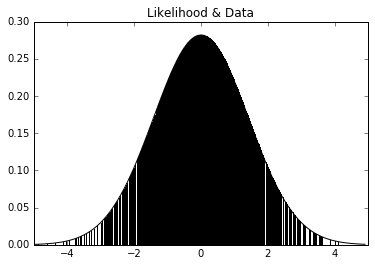

In [5]:
plt.xlim(dmin,dmax)
plt.plot(x_arr,f_arr,color='black')
markerline, stemlines, baseline = plt.stem(data,lh_data)
plt.setp(markerline, color='black', markersize=1., markeredgewidth = 0.)
plt.setp(stemlines, color='black')
plt.title("Likelihood & Data")
plt.show()

## Analytic solution

In [6]:
alpha=60
beta=130
prior=invgamma(alpha,loc=0,scale=beta)
alphaprime=alpha+Nsamp/2
betaprime=beta+1/2.*np.sum(data**2)
posterior=invgamma(alphaprime,loc=0,scale=betaprime)

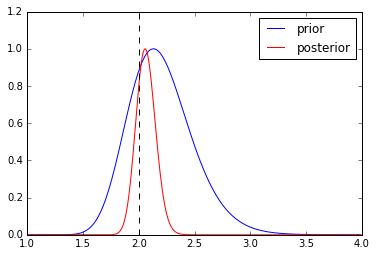

In [7]:
a=1
b=4
x=np.arange(a,b,0.01)
plt.xlim(a,b)
plt.ylim(0,1.2)
plt.plot(x,prior.pdf(x)/prior.pdf(x).max(),color='blue',label="prior")
plt.plot(x,posterior.pdf(x)/posterior.pdf(x).max(),color='red',label="posterior")
plt.plot([groundtruth,groundtruth],[0,1.2],linestyle='--',color='black')
plt.legend()
plt.show()

## Approximate Bayesian Computation (Likelihood-free rejection sampling)

In [8]:
# sufficient summary statistics
def summary_stat(data):
    return np.var(data)
data_ss=summary_stat(data)

In [9]:
# insufficient summary statistics: throw away most of the information
def summary_stat(data):
    return np.var(data[0:100])
data_ss=summary_stat(data)

In [10]:
def simulator(var):
    return norm(loc=0.,scale=np.sqrt(var)).rvs(size=Nsamp)
def distance(sim_ss,data_ss):
    return np.sqrt(np.sum((sim_ss-data_ss)**2))

In [11]:
Ntries=10000

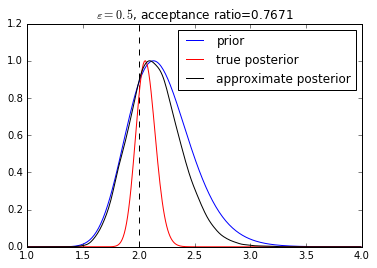

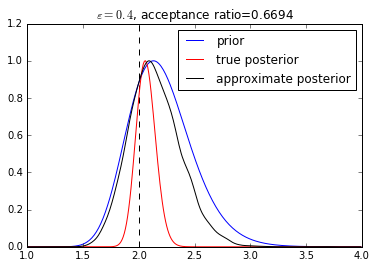

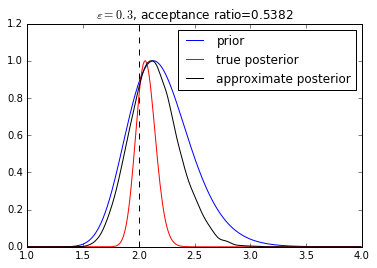

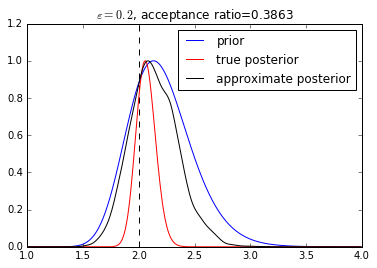

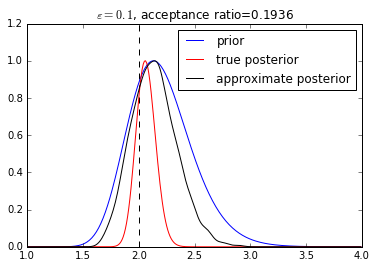

In [12]:
for epsilon in [0.5,0.4,0.3,0.2,0.1]:
    # likelihood-free rejection sampler
    samples=[]
    for this_try in xrange(Ntries):
        this_var = prior.rvs(size=1)
        this_sim = simulator(this_var)
        this_ss = summary_stat(this_sim)
        if(distance(this_ss,data_ss)<epsilon):
            samples.append(this_var)
    samples=np.array(samples).T[0]
    fraction_accepted=float(len(samples))/Ntries
    
    # kernel density estimation of the approximate posterior
    kernel=gaussian_kde(samples)
    
    # produce a plot
    plt.xlim(a,b)
    plt.ylim(0,1.2)
    plt.plot([groundtruth,groundtruth],[0,1.2],linestyle='--',color='black')
    plt.plot(x,prior.pdf(x)/prior.pdf(x).max(),color='blue',label="prior")
    plt.plot(x,posterior.pdf(x)/posterior.pdf(x).max(),color='red',label="true posterior")
    plt.plot(x,kernel.evaluate(x)/kernel.evaluate(x).max(),color='black',label="approximate posterior")
    plt.title("$\\varepsilon="+str(epsilon)+"$, acceptance ratio="+str(fraction_accepted))
    plt.legend()
    plt.show()